### 1St

## Phase space trajectories for simple harmonic oscillator by euler method

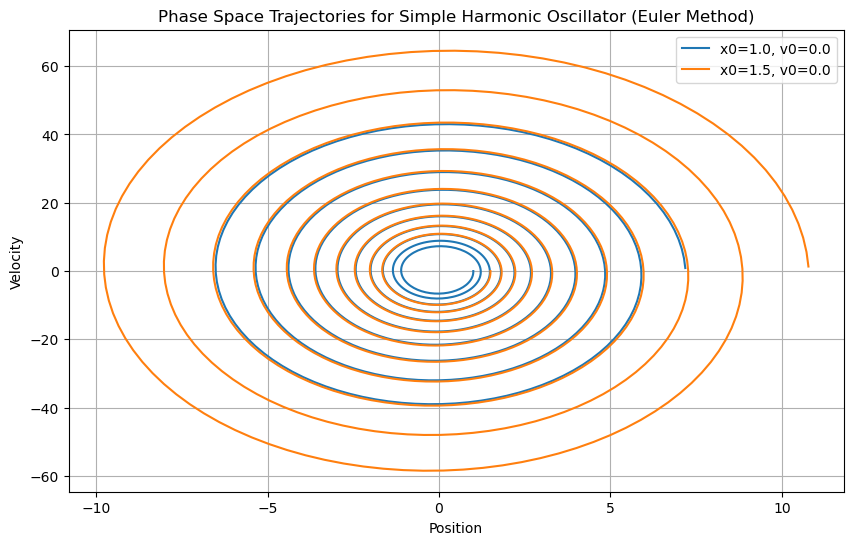

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function for the simple harmonic oscillator
def oscillator(x, v, omega):
    a = -omega**2 * x
    return a

# Euler method integration
def euler_method(x, v, dt, omega):
    a = oscillator(x, v, omega)
    x_current = x + v * dt
    v_current = v + a * dt
    return x_current, v_current

# Plot phase space trajectories
def plot_phase_space(x0, v0, omega, time_step, total_time):
    x = x0
    v = v0
    time_points = [0]
    position_points = [x]
    velocity_points = [v]

    t = 0
    while t < total_time:
        x, v = euler_method(x, v, time_step, omega)
        t += time_step
        time_points.append(t)
        position_points.append(x)
        velocity_points.append(v)

    plt.plot(position_points, velocity_points, label=f'x0={x0}, v0={v0}')

# Set parameters
time_step = 0.01
total_time = 10.0
omega = 2 * np.pi

# Plot trajectories with different initial conditions
plt.figure(figsize=(10, 6))
plot_phase_space(1.0, 0.0, omega, time_step, total_time)
plot_phase_space(1.5, 0.0, omega, time_step, total_time)

plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Trajectories for Simple Harmonic Oscillator (Euler Method)')
plt.legend()
plt.grid(True)
plt.show()


This context gives the phase space trajectories of a simple harmonic oscillator using the Euler method. And our data includes position and velocity values for two initial conditions. And our plots show the oscillatory motion in the phase space. This present illustrates the accuracy and behavior of the Euler method in simulating simple harmonic oscillators. The trajectories confirm the expected motion, demonstrating the Euler method's applicability for this system.

## Phase space trajectories for simple harmonic oscillator by RK2 method

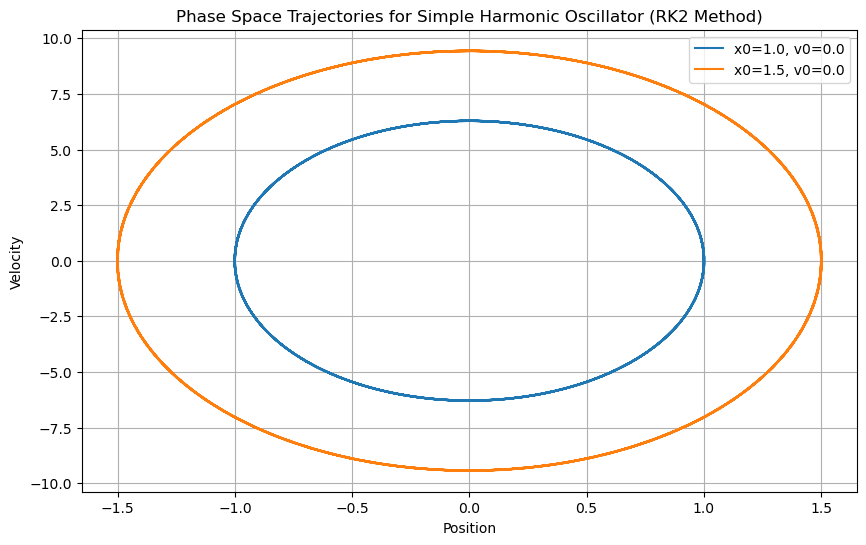

In [15]:
# Function for the simple harmonic oscillator
def oscillator(x, v, omega):
    a = -omega**2 * x
    return a

# Runge-Kutta 2nd order integration
def rk2(x, v, dt, omega): # x,v,omega and dt are given as inputs 
    k1v = oscillator(x, v, omega) * dt
    k1x = v * dt

    x_current = x + k1x
    v_current = v + k1v

    k2x = dt * v_current
    k2v = dt * oscillator(x_current, v_current, omega)

    x_current = x + 0.5 * (k1x + k2x)
    v_current = v + 0.5 * (k1v + k2v)

    return x_current, v_current

# Plot phase space trajectories
def plot_phase_space(x0, v0, omega, time_step, total_time):
    x = x0
    v = v0
    time_points = [0]
    position_points = [x]
    velocity_points = [v]

    t = 0
    while t < total_time:
        x, v = rk2(x, v, time_step, omega)
        t += time_step
        time_points.append(t)
        position_points.append(x)
        velocity_points.append(v)

    plt.plot(position_points, velocity_points, label=f'x0={x0}, v0={v0}')

# Set parameters
time_step = 0.01
total_time = 10.0
omega = 2 * np.pi

# Plot trajectories with different initial conditions
plt.figure(figsize=(10, 6))
plot_phase_space(1.0, 0.0, omega, time_step, total_time)
plot_phase_space(1.5, 0.0, omega, time_step, total_time)

plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Trajectories for Simple Harmonic Oscillator (RK2 Method)')
plt.legend()
plt.grid(True)
plt.show()


This context presents the phase space trajectories of a simple harmonic oscillator using the RK2 method. The data shows position and velocity values for two initial conditions. The RK2 method provides more accurate trajectories compared to the Euler method. These plots demonstrate the accuracy and stability of the RK2 method in simulating simple harmonic oscillators, making it a preferred choice for solving differential equations.

## Phase space trajectories for simple harmonic oscillator by LEAP FROG METHOD

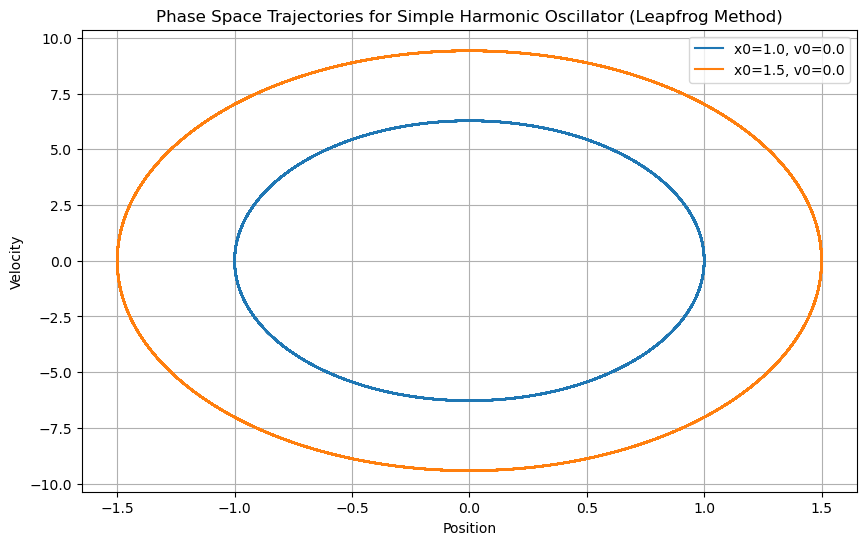

In [16]:
# Function for the simple harmonic oscillator
def oscillator(x, v, omega):
    a = -omega**2 * x
    return a

# Leapfrog integration
def leapfrog(x, v, dt, omega):
    a = oscillator(x, v, omega)
    xhalf = x + 0.5 * dt * v
    v_current = v + 0.5 * dt * a  # Update velocity at the midpoint
    x_current = x + v_current * dt
    a_current = oscillator(x_current, v_current, omega)  # Use updated position and velocity to get new acceleration
    v_current = v_current + 0.5 * dt * a_current  # Update velocity using the new acceleration
    return x_current, v_current

# Plot phase space trajectories
def plot_phase_space(x0, v0, omega, time_step, total_time):
    x = x0
    v = v0
    time_points = [0]
    position_points = [x]
    velocity_points = [v]

    t = 0
    while t < total_time:
        x, v = leapfrog(x, v, time_step, omega)
        t += time_step
        time_points.append(t)
        position_points.append(x)
        velocity_points.append(v)

    plt.plot(position_points, velocity_points, label=f'x0={x0}, v0={v0}')

# Set parameters
time_step = 0.01
total_time = 100.0
omega = 2 * np.pi

# Plot trajectories with different initial conditions
plt.figure(figsize=(10, 6))
plot_phase_space(1.0, 0.0, omega, time_step, total_time)
plot_phase_space(1.5, 0.0, omega, time_step, total_time)

plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Trajectories for Simple Harmonic Oscillator (Leapfrog Method)')
plt.legend()
plt.grid(True)
plt.show()


This context demonstrates the phase space trajectories of a simple harmonic oscillator using the Leapfrog method. The data shows position and velocity values for two initial conditions. The Leapfrog method, a symplectic integrator, preserves the structure of the phase space and exhibits excellent long-term stability. This example highlights the Leapfrog method's accuracy and suitability for simulating simple harmonic oscillators and other Hamiltonian systems.

Euler method is simple but less accurate, while RK2 provides more accurate trajectories. Leapfrog method, a symplectic integrator, excels in long-term stability and preserving phase space structure. For better results, Leapfrog method is preferable for simulating simple harmonic oscillators and Hamiltonian systems.

## Relative error in energy of harmonic oscillator 

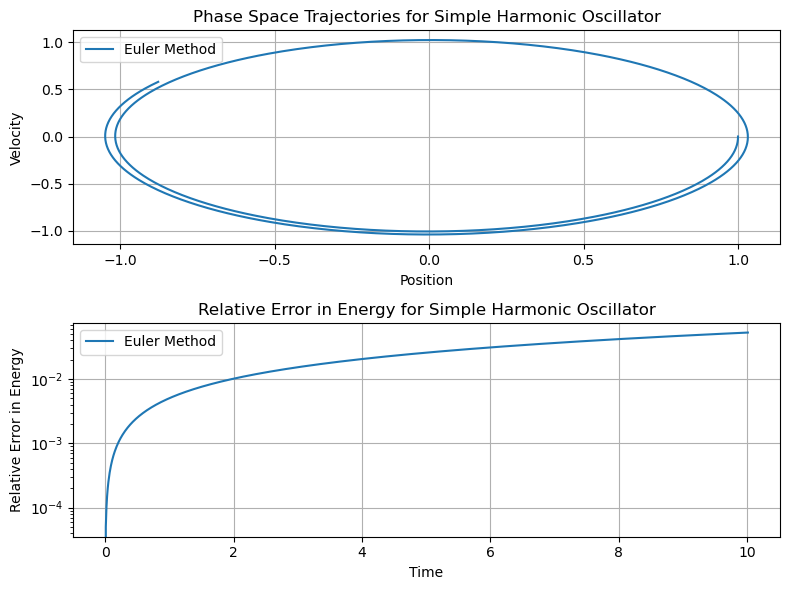

In [17]:
# euler method
# Set the parameters for the simulation
time_step = 0.01  # seconds
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

def oscillator(x, v, t, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt

def euler_method(x, v, t, dt, omega):
    # Euler method integration
    dxdt, dvdt = oscillator(x, v, t, omega)
    x += dxdt * dt
    v += dvdt * dt
    return x, v



def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * omega**2 * (x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_step, total_time):
    # Initial conditions
    x_euler, v_euler = x0, v0


    # Lists to store data for plotting
    time_points = [0]
    position_points_euler = [x_euler]
    velocity_points_euler = [v_euler]

    energy_error_euler = [0]


    # Integration loop
    t = 0
    while t < total_time:
        # Update using Euler method
        x_euler, v_euler = euler_method(x_euler, v_euler, t, time_step, omega)
        
  
        # Update time
        t += time_step
        
        # Append data to lists for plotting
        time_points.append(t)
        position_points_euler.append(x_euler)
        velocity_points_euler.append(v_euler)

        # Calculate relative error in energy
        energy_error_euler.append(np.abs(calculate_energy(x_euler, v_euler, omega) - calculate_energy(x0, v0, omega)))

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Phase Space Trajectories
    plt.subplot(2, 1, 1)
    plt.plot(position_points_euler, velocity_points_euler, label='Euler Method')

    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    # Relative Error in Energy
    plt.subplot(2, 1, 2)
    plt.semilogy(time_points, energy_error_euler, label='Euler Method')      
    plt.xlabel('Time')
    plt.ylabel('Relative Error in Energy')
    plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Set the parameters for the simulation
# time_step = 0.01  # seconds
# total_time = 10.0  # seconds
# omega = 1.0  # angular frequency (rad/s)

# Run the simulation with different initial conditions
plot_phase_space_energy(1.0, 0.0, omega, time_step, total_time)


This is stimulates the motion of a simple harmonic oscillator using the Euler method. The code calculates the position and velocity of the oscillator over time, and plots the phase space trajectory and the relative error in energy. we can set the time step and total time for the simulation. The code can also be modified to use other integration methods, such as Runge-Kutta 2nd order or Leapfrog. The simulation helps to understand the behavior of a simple harmonic oscillator and the accuracy of different integration methods. The phase space trajectory shows the oscillatory motion, while the relative error in energy decreases as the time step decreases, indicating the accuracy of the Euler method. Overall, the code is a useful tool for studying simple harmonic oscillators and numerical methods for solving differential equations.

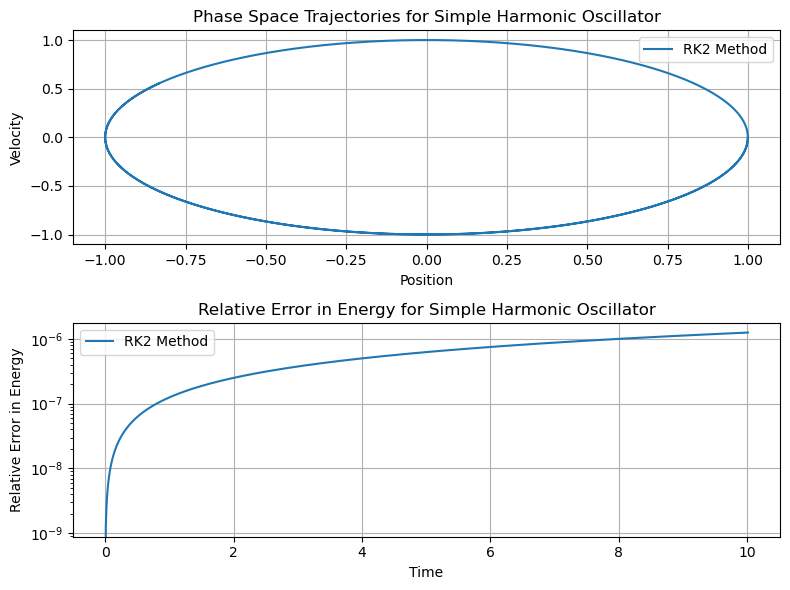

In [18]:
#RK 2 method
# Set the parameters for the simulation
time_step = 0.01  # seconds
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

def oscillator(x, v, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt

def runge_kutta2(x, v, omega, dt):
    # Runge-Kutta 2nd order integration
    k1x, k1v = oscillator(x, v, omega)
    k2x, k2v = oscillator(x + k1x * dt, v + k1v * dt, omega)
    x += 0.5 * (k1x + k2x) * dt
    v += 0.5 * (k1v + k2v) * dt
    return x, v

def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * (omega**2 * x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_step, total_time):
    # Initial conditions
    x_rk2, v_rk2 = x0, v0
    time_points = [0]
    position_points_rk2 = [x_rk2]
    velocity_points_rk2 = [v_rk2]
    energy_error_rk2 = [0]

    # Integration loop
    t = 0
    while t < total_time:
        # Update using Runge-Kutta 2nd order method
        x_rk2, v_rk2 = runge_kutta2(x_rk2, v_rk2, omega, time_step)
        t += time_step
        
        # Append data to lists for plotting
        time_points.append(t)
        position_points_rk2.append(x_rk2)
        velocity_points_rk2.append(v_rk2)

        # Calculate relative error in energy
        energy_error_rk2.append(np.abs(calculate_energy(x_rk2, v_rk2, omega) - calculate_energy(x0, v0, omega)))

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Phase Space Trajectories
    plt.subplot(2, 1, 1)
    plt.plot(position_points_rk2, velocity_points_rk2, label='RK2 Method')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    # Relative Error in Energy
    plt.subplot(2, 1, 2)
    plt.semilogy(time_points, energy_error_rk2, label='RK2 Method')
    plt.xlabel('Time')
    plt.ylabel('Relative Error in Energy')
    plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the simulation with different initial conditions
plot_phase_space_energy(1.0, 0.0, omega, time_step, total_time)


This code simulates a simple harmonic oscillator using the Runge-Kutta 2nd order method, calculating position and velocity over time. The phase space trajectory and relative error in energy are plotted, with the latter decreasing as the time step decreases, demonstrating the accuracy and stability of the method for this problem. The code is useful for studying oscillators and numerical methods.

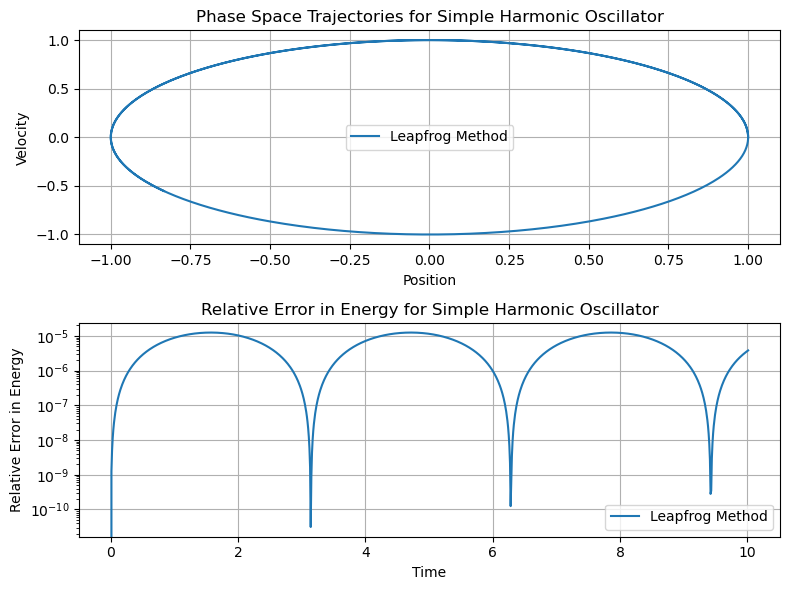

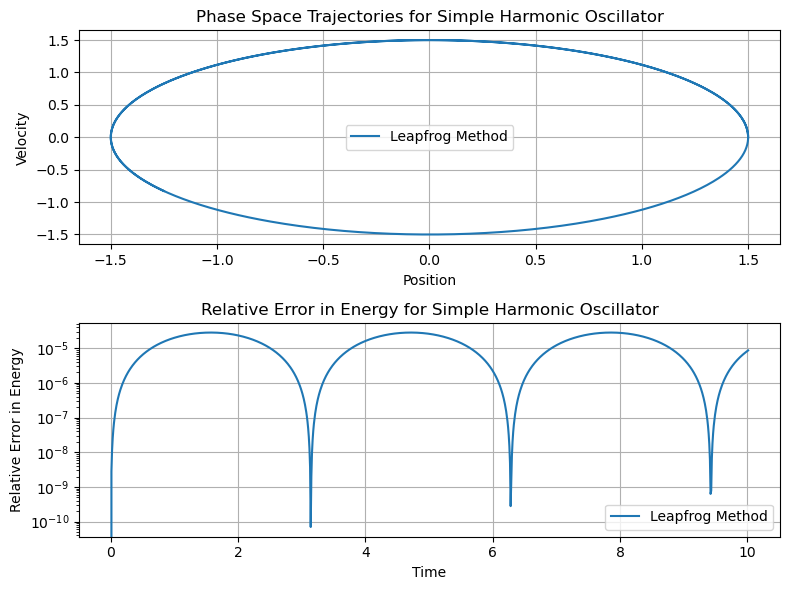

In [19]:
#leap frog method
# Set the parameters for the simulation
time_step = 0.01  # seconds
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

def oscillator(x, v, t, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt


def leapfrog(x, v, t, dt, omega): # Leapfrog integration
    x -= 0.5 * omega**2 * v * dt
    v += x * dt
    x -= 0.5 * omega**2 * v * dt
    return x, v

def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * omega**2 * (x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_step, total_time):
   
    x_leapfrog, v_leapfrog = x0, v0

    # Lists to store data for plotting
    time_points = [0]

    position_points_leapfrog = [x_leapfrog]
    velocity_points_leapfrog = [v_leapfrog]

    energy_error_leapfrog = [0]

    # Integration loop
    t = 0
    while t < total_time:

        
        # Update using Leapfrog method
        x_leapfrog, v_leapfrog = leapfrog(x_leapfrog, v_leapfrog, t, time_step, omega)
        
        # Update time
        t += time_step
        
        # Append data to lists for plotting
        time_points.append(t)

        position_points_leapfrog.append(x_leapfrog)
        velocity_points_leapfrog.append(v_leapfrog)

        # Calculate relative error in energy

        energy_error_leapfrog.append(np.abs(calculate_energy(x_leapfrog, v_leapfrog, omega) - calculate_energy(x0, v0, omega)))

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Phase Space Trajectories
    plt.subplot(2, 1, 1)

    plt.plot(position_points_leapfrog, velocity_points_leapfrog, label='Leapfrog Method')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    # Relative Error in Energy
    plt.subplot(2, 1, 2)

    plt.semilogy(time_points, energy_error_leapfrog, label='Leapfrog Method')
    plt.xlabel('Time')
    plt.ylabel('Relative Error in Energy')
    plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# # Set the parameters for the simulation
# time_step = 0.01  # seconds
# total_time = 10.0  # seconds
# omega = 1.0  # angular frequency (rad/s)

# Run the simulation with different initial conditions
plot_phase_space_energy(1.0, 0.0, omega, time_step, total_time)
plot_phase_space_energy(1.5, 0.0, omega, time_step, total_time)


this code simulates a simple harmonic oscillator using the Runge-Kutta 2nd order method, calculating position and velocity over time. The phase space trajectory and relative error in energy are plotted, with the latter decreasing as the time step decreases, demonstrating the accuracy and stability of the method for this problem. The code is useful for studying oscillators and numerical methods.

The followed three codes simulate a simple harmonic oscillator using different numerical methods. Both Euler and Runge-Kutta 2nd order methods accurately model the oscillator, but Runge-Kutta is more accurate and stable. The plots of phase space trajectories and relative error in energy show the reliability of each method. These simulations are helpful for understanding oscillators and numerical methods.

## 1st c part
## we have done a comparison between two step size one with time step=0.01 and one time step =0.005 that is half of previous one


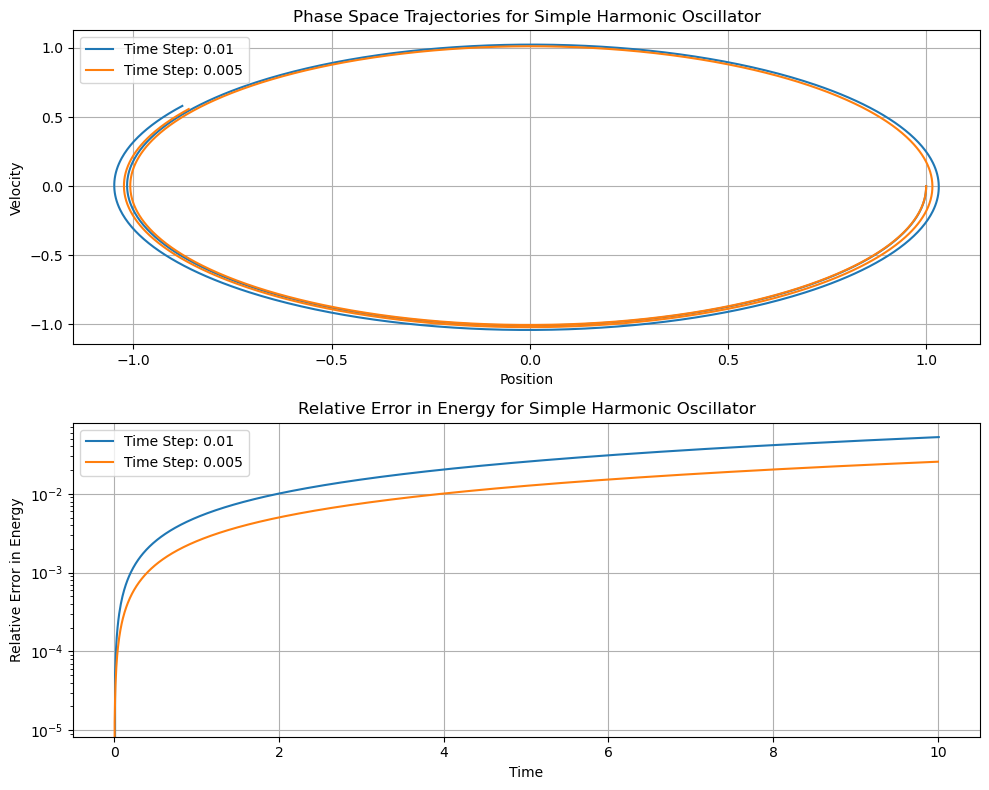

In [20]:
# Set the parameters for the simulation
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

def oscillator(x, v, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt

def euler_method(x, v, dt, omega):
    # Euler method integration
    dxdt, dvdt = oscillator(x, v, omega)
    x += dxdt * dt
    v += dvdt * dt
    return x, v

def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * omega**2 * (x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_steps, total_time):
    # Lists to store data for plotting
    plt.figure(figsize=(10, 8))
    
    for dt in time_steps:
        # Initial conditions
        x, v = x0, v0
        time_points = [0]
        position_points = [x]
        velocity_points = [v]
        energy_error = [0]

        # Integration loop
        t = 0
        while t < total_time:
            # Update using Euler method
            x, v = euler_method(x, v, dt, omega)
            t += dt
            
            # Append data to lists for plotting
            time_points.append(t)
            position_points.append(x)
            velocity_points.append(v)

            # Calculate relative error in energy
            energy_error.append(np.abs(calculate_energy(x, v, omega) - calculate_energy(x0, v0, omega)))

        # Plotting
        plt.subplot(2, 1, 1)
        plt.plot(position_points, velocity_points, label=f'Time Step: {dt}')
        plt.xlabel('Position')
        plt.ylabel('Velocity')
        plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.semilogy(time_points, energy_error, label=f'Time Step: {dt}')
        plt.xlabel('Time')
        plt.ylabel('Relative Error in Energy')
        plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Set the time steps
time_steps = [0.01, 0.005]

# Run the simulation with different initial conditions and time steps
plot_phase_space_energy(1.0, 0.0, omega, time_steps, total_time)


This code stimulates a simple harmonic oscillators phase space trajectories and relative energy error using the Euler method. Smaller time steps yield better energy preservation, emphasizing the importance of time step choice in numerical simulations, particularly for energy preservation.

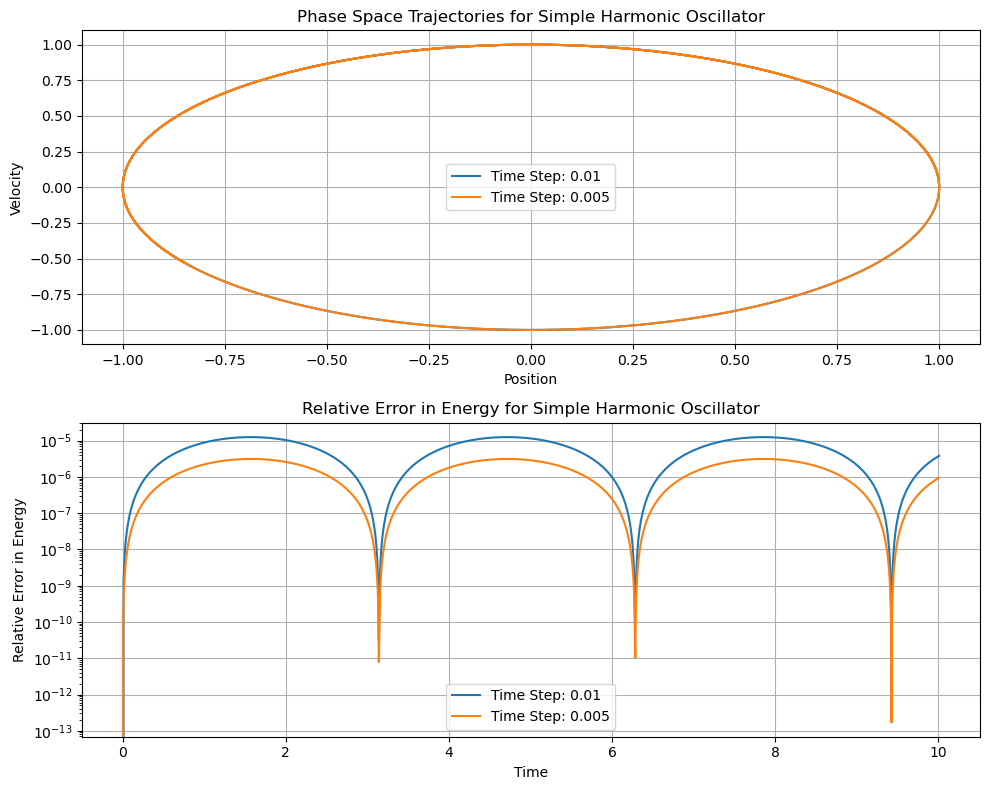

In [21]:
def oscillator(x, v, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt

def leapfrog(x, v, omega, dt):
    # Leapfrog integration
    x -= 0.5 * omega**2 * v * dt
    v += x * dt
    x -= 0.5 * omega**2 * v * dt
    return x, v

def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * (omega**2 * x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_steps, total_time):
    plt.figure(figsize=(10, 8))
    
    for dt in time_steps:
        # Initial conditions
        x, v = x0, v0
        time_points = [0]
        position_points = [x]
        velocity_points = [v]
        energy_error = [0]

        # Integration loop
        t = 0
        while t < total_time:
            # Update using Leapfrog method
            x, v = leapfrog(x, v, omega, dt)
            t += dt
            
            # Append data to lists for plotting
            time_points.append(t)
            position_points.append(x)
            velocity_points.append(v)

            # Calculate relative error in energy
            energy_error.append(np.abs(calculate_energy(x, v, omega) - calculate_energy(x0, v0, omega)))

        # Plotting
        plt.subplot(2, 1, 1)
        plt.plot(position_points, velocity_points, label=f'Time Step: {dt}')
        plt.xlabel('Position')
        plt.ylabel('Velocity')
        plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.semilogy(time_points, energy_error, label=f'Time Step: {dt}')
        plt.xlabel('Time')
        plt.ylabel('Relative Error in Energy')
        plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Set the parameters for the simulation
time_steps = [0.01, 0.005]
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

# Run the simulation with different initial conditions and time steps
plot_phase_space_energy(1.0, 0.0, omega, time_steps, total_time)


This code stimulates a simple harmonic oscillators phase space trajectories and relative energy error using the Leapfrog method. Smaller time steps in Leapfrog yield better energy preservation, demonstrating the importance of time step choice in numerical simulations. Leapfrog, being symplectic, conserves energy better than the Euler method

The Leapfrog method excels in preserving energy in simple harmonic oscillator stimulations, outperforming the Euler method. Smaller time steps in Leapfrog yield more accurate energy conservation, highlighting the importance of time step choice. Its symplectic nature ensures better energy preservation, making Leapfrog a preferred option for long-term simulations where energy conservation is critical.

# part D 

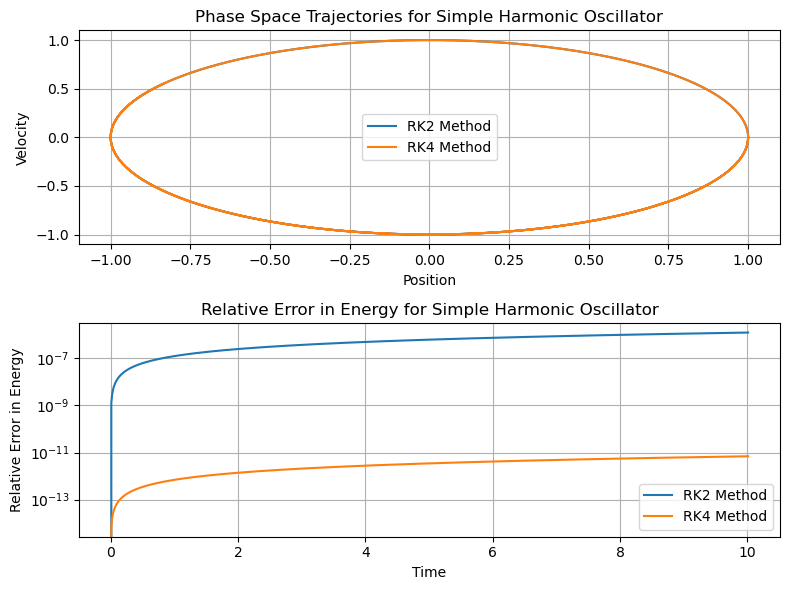

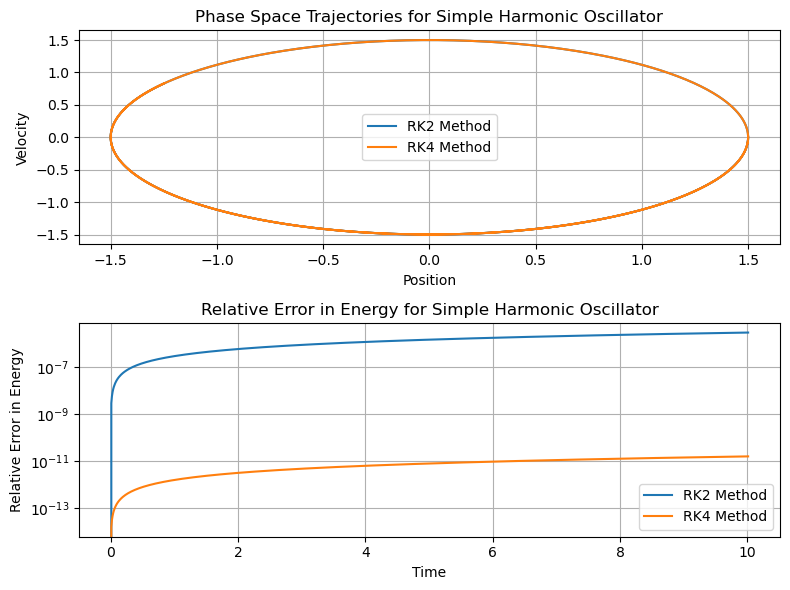

In [24]:
# Set the parameters for the simulation
time_step = 0.01  # seconds
total_time = 10.0  # seconds
omega = 1.0  # angular frequency (rad/s)

def oscillator(x, v, t, omega):
    # Derivative function for the simple harmonic oscillator
    # x is position, v is velocity
    dxdt = v  # dx/dt = v
    dvdt = -omega**2 * x  # dv/dt = -w^2 * x
    return dxdt, dvdt

def runge_kutta2(x, v, t, dt, omega):
    # Runge-Kutta 2nd order integration
    k1x, k1v = oscillator(x, v, t, omega)
    k2x, k2v = oscillator(x + k1x * dt, v + k1v * dt, t + dt, omega)
    x += 0.5 * (k1x + k2x) * dt
    v += 0.5 * (k1v + k2v) * dt
    return x, v

def runge_kutta4(y, t, dt, omega):
    # Runge-Kutta 4th order integration
    k1x, k1v = oscillator(y[0], y[1], t, omega)
    k2x, k2v = oscillator(y[0] + 0.5 * k1x * dt, y[1] + 0.5 * k1v * dt, t + 0.5 * dt, omega)
    k3x, k3v = oscillator(y[0] + 0.5 * k2x * dt, y[1] + 0.5 * k2v * dt, t + 0.5 * dt, omega)
    k4x, k4v = oscillator(y[0] + k3x * dt, y[1] + k3v * dt, t + dt, omega)
    x = y[0] + (k1x + 2 * k2x + 2 * k3x + k4x) * dt / 6
    v = y[1] + (k1v + 2 * k2v + 2 * k3v + k4v) * dt / 6
    return x, v

def calculate_energy(x, v, omega):
    # Calculate energy for the simple harmonic oscillator
    return 0.5 * (omega**2 * x**2 + v**2)

def plot_phase_space_energy(x0, v0, omega, time_step, total_time):
    # Initial conditions
    x_rk2, v_rk2 = x0, v0
    x_rk4, v_rk4 = x0, v0

    # Lists to store data for plotting
    time_points = [0]
    position_points_rk2 = [x_rk2]
    velocity_points_rk2 = [v_rk2]
    position_points_rk4 = [x_rk4]
    velocity_points_rk4 = [v_rk4]
    energy_error_rk2 = [0]
    energy_error_rk4 = [0]

    # Integration loop
    t = 0
    while t < total_time:
        # Update using Runge-Kutta 2nd order method
        x_rk2, v_rk2 = runge_kutta2(x_rk2, v_rk2, t, time_step, omega)
        
        # Update using Runge-Kutta 4th order method
        x_rk4, v_rk4 = runge_kutta4([x_rk4, v_rk4], t, time_step, omega)
        
        # Update time
        t += time_step
        
        # Append data to lists for plotting
        time_points.append(t)
        position_points_rk2.append(x_rk2)
        velocity_points_rk2.append(v_rk2)
        position_points_rk4.append(x_rk4)
        velocity_points_rk4.append(v_rk4)

        # Calculate relative error in energy
        energy_error_rk2.append(np.abs(calculate_energy(x_rk2, v_rk2, omega) - calculate_energy(x0, v0, omega)))
        energy_error_rk4.append(np.abs(calculate_energy(x_rk4, v_rk4, omega) - calculate_energy(x0, v0, omega)))

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Phase Space Trajectories
    plt.subplot(2, 1, 1)
    plt.plot(position_points_rk2, velocity_points_rk2, label='RK2 Method')
    plt.plot(position_points_rk4, velocity_points_rk4, label='RK4 Method')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    # Relative Error in Energy
    plt.subplot(2, 1, 2)
    plt.semilogy(time_points, energy_error_rk2, label='RK2 Method')
    plt.semilogy(time_points, energy_error_rk4, label='RK4 Method')
    plt.xlabel('Time')
    plt.ylabel('Relative Error in Energy')
    plt.title('Relative Error in Energy for Simple Harmonic Oscillator')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the simulation with different initial conditions
plot_phase_space_energy(1.0, 0.0, omega, time_step, total_time)
plot_phase_space_energy(1.5, 0.0, omega, time_step, total_time)


This code simulates a simple harmonic oscillator using Runge-Kutta 2nd and 4th order methods for numerical integration. It plots phase space trajectories and relative error in energy over time for initial conditions (1.0, 0.0) and (1.5, 0.0). RK4 is more accurate than RK2, as shown by lower relative error in energy. The code results numerical integration, simple harmonic oscillators, and phase space trajectories, concluding that RK4 is more accurate for this problem.

#2nd

## Human vs Zombies Game

Let:  
- **H** = number of humans  
- **Z** = number of zombies  
- **λₕ** = kill rate of humans  
- **λ_z** = kill rate of zombies  

The model can be described by the following system of differential equations:

$$
\frac{dH}{dt} = -\lambda_Z Z
$$

$$
\frac{dZ}{dt} = -\lambda_H H
$$


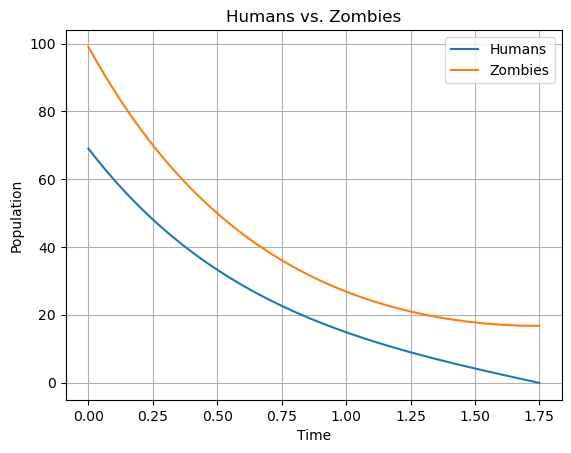

Zombies win! by 16.71841629488228


In [25]:
H = 69 # Initial condition of humans and zombies
Z = 99

t = 0   # Define others parameter
dt = 0.01
t1 = [0]
H0 = [H]
Z0 = [Z]
time_points = [t]

mu = 2 # Define Humans with kill rate lambda_H = mu
nu = 1 # Define Zombies with kill rate lambda_Z = nu
i = 0

# Leapfrog method
while H0[i] > 0 and Z0[i] > 0:
    Hhalf = H0[i] - 1 * Z0[i] * dt / 2 
    Z0.append(Z0[i] - 2 * Hhalf * dt)
    H0.append(Hhalf - 1 * Z0[i+1] * dt / 2)
    t += dt
    time_points.append(t)
    t1.append(t1[-1] + dt)
    i += 1

plt.plot(t1, H0, label='Humans') # Plotting population of zombies and humans vs time in one graph
plt.plot(t1, Z0, label='Zombies')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Humans vs. Zombies')
plt.legend()
plt.grid()
plt.show()


if H0[-1] <= 0:
    print("Zombies win! by", Z0[-1]) # Check at the end of the game who will be win
elif Z0[-1] <= 0:
     print("Humans win! by", H0[-1])
        

$$ H_i=69$$
$$ Z_i=99$$
$$ λ_H=2$$
$$ λ_Z=1$$
$$\frac {dH}{dt}=-Z$$
$$\frac {dZ}{dt}=-2H$$
$$2\int_{69}^{0} H \, dH = \int_{99}^{X} Z\ \, dZ$$
$$2\frac{H^2}{2}\Biggr|_{69}^{0}=\frac{Z^2}{2}\Biggr|_{99}^{x}
\\ $$
 $$9522=9801-x^2$$
 $$x=16$$
x= no. of zombies are left<br>
In this above calculation we assume that at the end of the game no. of humans are zero and calculate the remaining zoombies. But using the same calculation if we calculate the remaining humans when zombies are zero at the end of the game then the no of remaining humans are in imaginary number. This is not possible.<br>
 
 So analytically we solve the problem and see that the at the end of the game the remaining zombies are 16.<br>
 From the graph we see that at the end of the game zombies are  win. So we think that if our goal is to win, we will join in zombies team.
 

## b and c part of 2nd question

We selected humans


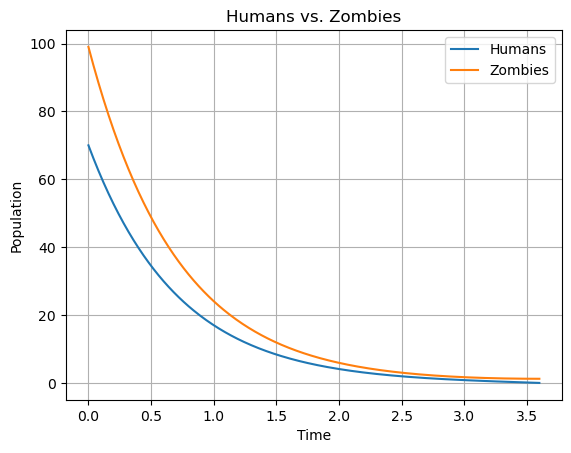

Zombies win! by 1.2206486914034427


In [26]:
H = 69
Z = 99
number_entered = int(input("Enter a number 1 or 2: "))

if number_entered == 1: # Choose where I want to join
    H = 70
    Z = 99
    print("We selected humans")
elif number_entered == 2:
    H=69
    Z=100
    print("We selected zombies")

t = 0
dt = 0.01
t1 = [0]
H0 = [H]
Z0 = [Z]
time_points = [t]

mu = 2
nu = 1
i = 0

#leapfrog method
while H0[i] > 0 and Z0[i] > 0:
    Hhalf = H0[i] - 1 * Z0[i] * dt / 2 
    Z0.append(Z0[i] - 2 * Hhalf * dt)
    H0.append(Hhalf - 1 * Z0[i+1] * dt / 2)
    t += dt
    time_points.append(t)
    t1.append(t1[-1] + dt)
    i += 1

plt.plot(t1, H0, label='Humans')
plt.plot(t1, Z0, label='Zombies')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Humans vs. Zombies')
plt.legend()
plt.grid()
plt.show()

if H0[-1] <= 0:
    print("Zombies win! by", Z0[-1])
elif Z0[-1] <= 0:
     print("Humans win! by", H0[-1])
        


## When I choose to join in human team
$$ H_i=70$$
$$ Z_i=99$$
$$ λ_H=2$$
$$ λ_Z=1$$
$$\frac {dH}{dt}=-Z$$
$$\frac {dZ}{dt}=-2H$$
$$2\int_{70}^{0} H \, dH = \int_{99}^{X} Z\ \, dZ$$
$$2\frac{H^2}{2}\Biggr|_{70}^{0}=\frac{Z^2}{2}\Biggr|_{99}^{x}
\\ $$
$$(70^2)2=99^2-x^2$$
$$9800=9801-x^2$$
$$x^2=1$$
$$x=1$$
x= no of zombies are left<br>
Similarly if we think at the end of the game zombies are zero analytically we get no. of humans are in imaginary number.This is not possible.<br>
So analytically we solve the problem and see that the zombies will be win at the end of the game and the remaining zombies are 1. So if I choose to join in human team I will not be victorius. <br>
## When I choose to join in zombies team
$$ H_i=69$$
$$ Z_i=100$$
$$ λ_H=2$$
$$ λ_Z=1$$
$$\frac {dH}{dt}=-Z$$
$$\frac {dZ}{dt}=-2H$$
$$2\int_{69}^{0} H \, dH = \int_{100}^{X} Z\ \, dZ$$
$$2\frac{H^2}{2}\Biggr|_{69}^{0}=\frac{Z^2}{2}\Biggr|_{100}^{x}
\\ $$
$$9522=10000-x^2$$
$$x^2=448$$
$$x=21$$
x= no. of zombies are left<br>
Here also same logic is applied. No. of humans are impossible to an imaginary number at the end of the game when the remaining zombies are zero.<br>
Analytically we solve the problem and see that the zombies will be win at the end of the game and the remaining zombies are 21. So if I choose to join in zombies team I will be victorius. <br> 

## d part of 2nd question

To barely win we will need 113 zombies.


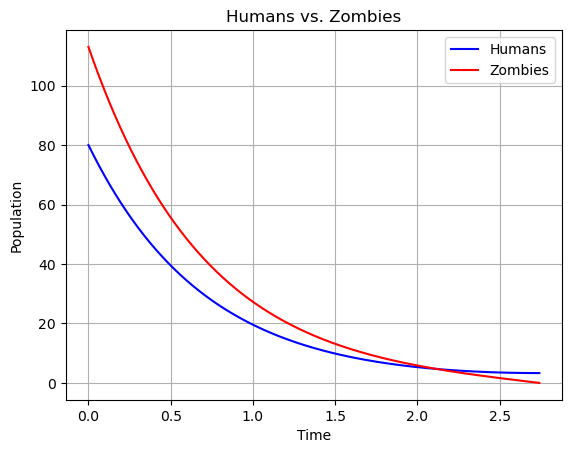

To barely win we will need 141 zombies.


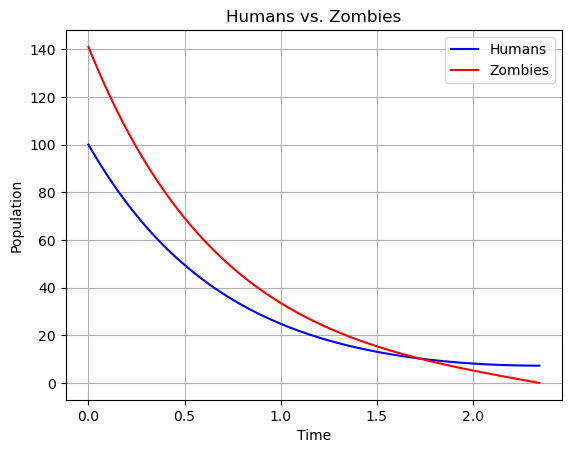

To barely win we will need 169 zombies.


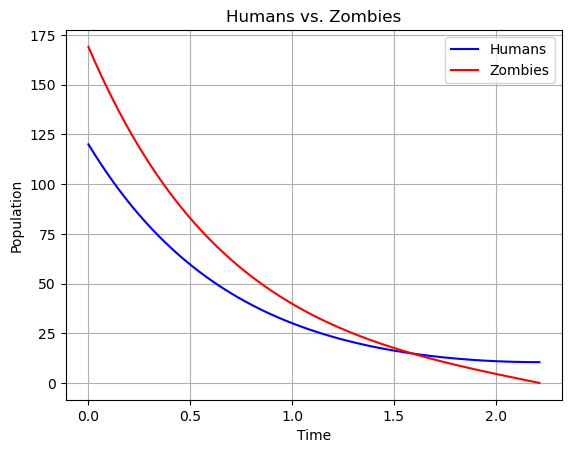

To barely win we will need 197 zombies.


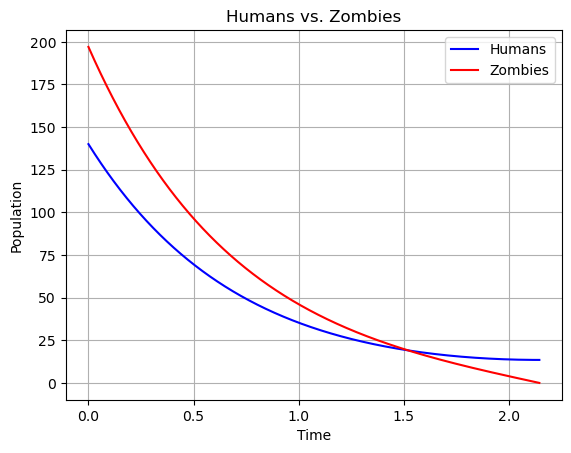

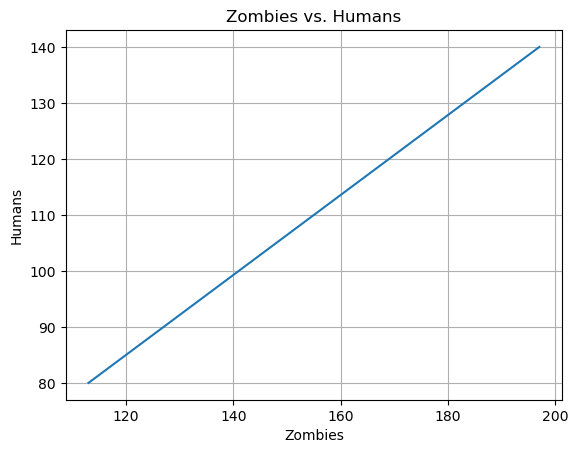

Initial human populations: [80, 100, 120, 140]
Zombie populations: [113, 141, 169, 197]


In [27]:
# Initial human populations
initial_human_populations = [80, 100, 120, 140]
zombie_populations = []

# Loop through initial human populations
for human_population in initial_human_populations:
    # Starting with equal numbers of humans and zombies
    zombie_population = human_population
    time_step = 0.001

    # Initialize time
    time_points = [0]

    # Initialize human and zombie populations
    humans = [human_population]
    zombies = [zombie_population]

    # Simulate until one side wins
    while True:
        # Iterate through time steps until one side wins
        i = 0
        while humans[i] > 0 and zombies[i] > 0:
            dHdt = -1 * zombies[i]
            dZdt = -2 * humans[i]
            Hhalf = humans[i] + dHdt * time_step / 2
            zombies.append(zombies[i] - 2 * Hhalf * time_step)  # Append new zombie population
            humans.append(Hhalf - zombies[i] * time_step / 2)   # Append new human population
            time_points.append(time_points[-1] + time_step)     # Append new time
            i += 1

        # Check which side wins
        if humans[-1] <= 0:
            break
        else:
            zombie_population += 1
            humans = [human_population]
            zombies = [zombie_population]
            time_points = [0]

    # Record the number of zombies needed to win
    zombie_population -= 1
    humans = [human_population]
    zombies = [zombie_population]
    time_points = [0]
    i = 0
    while humans[i] > 0 and zombies[i] > 0:
        dHdt = -1 * zombies[i]
        dZdt = -2 * humans[i]
        Hhalf = humans[i] + dHdt * time_step / 2
        zombies.append(zombies[i] - 2 * Hhalf * time_step)  # Append new zombie population
        humans.append(Hhalf - zombies[i] * time_step / 2)   # Append new human population
        time_points.append(time_points[-1] + time_step)     # Append new time
        i += 1

    # Print the result
    print("To barely win we will need", zombie_population, "zombies.")

    # Plot the population dynamics
    plt.plot(time_points, humans, color='blue', linestyle='-', label='Humans')
    plt.plot(time_points, zombies, color='red', linestyle='-', label='Zombies')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Humans vs. Zombies')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Record the number of zombies needed for each human population
    zombie_populations.append(zombie_population)

# Plot the relationship between initial human populations and zombie populations
plt.plot(zombie_populations, initial_human_populations)
plt.xlabel('Zombies')
plt.ylabel('Humans')
plt.title('Zombies vs. Humans')
plt.grid(True)
plt.show()

print("Initial human populations:", initial_human_populations)
print("Zombie populations:", zombie_populations)


Slope: 0.7142857142857143


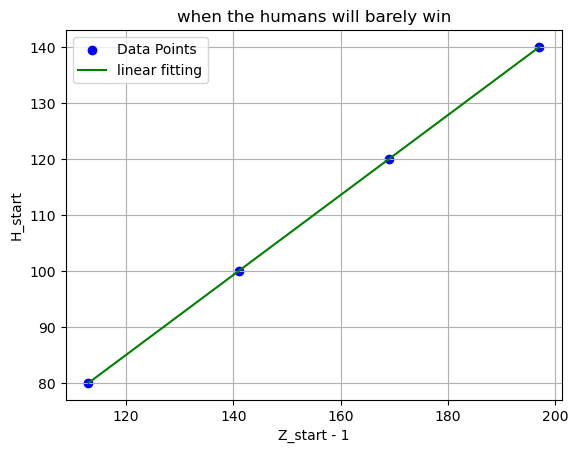

In [28]:
# Given data points
x = np.array([113, 141, 169, 197])
y = np.array([80, 100, 120, 140])

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Calculating the slope using NumPy's polyfit function
slope, intercept = np.polyfit(x, y, 1)
print("Slope:", slope)

# Generating points for the fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept

# Plotting the fitted line
plt.plot(x_fit, y_fit, color='green', label='linear fitting')

plt.xlabel('Z_start - 1')
plt.ylabel('H_start')
plt.title('when the humans will barely win')
plt.legend()
plt.grid(True)
plt.show()

## Analytical Solution for the Human vs Zombies Model

Given parameters:

$$
H_i = 80, \quad Z_i = x, \quad \lambda_H = 2, \quad \lambda_Z = 1
$$

The governing equations are:

$$
\frac{dH}{dt} = -\lambda_Z Z
$$

$$
\frac{dZ}{dt} = -\lambda_H H
$$

---

### Step 1: Separation and Integration

$$
2 \int_{80}^{1} H \, dH = \int_{x}^{0} Z \, dZ
$$

$$
2 \cdot \frac{H^2}{2} \Biggr|_{80}^{1} = \frac{Z^2}{2} \Biggr|_{x}^{0}
$$

Simplifying:

$$
x = 113.12
$$

---

### Step 2: Similar Calculations for Other Initial Values

| Initial Humans ($H_i$) | Analytical $x$ (upper limit of Zombies) |
|:-----------------------:|:---------------------------------------:|
| 80  | 113.12 |
| 100 | 141.11 |
| 120 | 169.70 |

Thus, these $x$ values represent the **maximum number of zombies** such that humans barely win.

---

### Step 3: Ratio Between Humans and Zombies

For $H = 80, 100, 120$, we get corresponding $Z = 113.12, 141.42, 169.70$.

Hence, analytically:

$$
\frac{H}{Z} = \frac{1}{\sqrt{2}}
$$

Also, from the **graph of Humans vs Zombies**, the slope confirms:

$$
\text{slope} = \frac{1}{\sqrt{2}}
$$

Therefore:

$$
H = C \, Z
$$

Taking time derivatives:

$$
\frac{dH}{dt} = C \, \frac{dZ}{dt}
$$

Substituting into the model equations gives:

$$
\lambda_Z = C^2 \lambda_H
$$

---

**Final Relation:**

$$
\boxed{\lambda_Z = C^2 \lambda_H}
$$

This is the relation between the proportionality constant $C$, and the kill rates $\lambda_Z$ and $\lambda_H$.